## Strong Lensing Time Delay metric

This metric is used to estimate the number of strongly lensed supernovae


## Imports

In [1]:
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import sqlite3
import numpy as np
from lsst.sims.maf.metrics.snSLMetric import SNSLMetric

## DB file choice

In [9]:
dbName = 'descddf_v1.4_10yrs.db'
dbFile = '/home/philippe/LSST/DB_Files/{}'.format(dbName)
#dbName = 'kraken_2026.db'
#dbFile = dbName
opsimdb = db.OpsimDatabase(dbFile)
version = opsimdb.opsimVersion
propinfo, proptags = opsimdb.fetchPropInfo()
#print('proptags and propinfo', proptags, propinfo)
runLength = opsimdb.fetchRunLength()

fieldtype='WFD' #fieldtype: DD or WFD

sqlconstraint = opsimdb.createSQLWhere(fieldtype, proptags)

Cannot access Config table to retrieve runLength; using default 10 years


In [10]:
yearDates = list(range(0, int(round(365 * runLength)) + 365, 365))
xmin=0
xmax=0.5
plotDict = {'title': 'NSN',
                'xlabel': 'z','xMin':xmin,'xMax':xmax}
            #'nTicks':10,
           #'colorMin': xmin,'colorMax':xmax}

#plotDict['bins'] = np.arange(0.,10.,0.01)

print(yearDates)
yearDates = yearDates[:2]


[0, 365, 730, 1095, 1460, 1825, 2190, 2555, 2920, 3285, 3650]


## Define slicer

In [11]:
slicer = slicers.HealpixSlicer(nside=64)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


## Make the bundles

### Run for selected years

In [12]:
bundleList= []

sql_i = sqlconstraint

metric = SNSLMetric(coadd=True)
    
for i in range(len(yearDates) - 1):
    sql_y = sql_i + \
    ' AND night > %i AND night <= %i' % (
        yearDates[i], yearDates[i + 1]) #sql constraint on the year
    plotDict['title'] = 'Y{}'.format(i+1)
    print(sql_y)
    bundleList.append(metricBundles.MetricBundle(
                metric, slicer, sql_y, runName= dbName,plotDict=plotDict))
print(len(bundleList))

proposalId = 1 AND night > 0 AND night <= 365
1


### Run over the complete sample

In [36]:
bundleList= []

sql_i = '' #sqlconstraint+' AND '
    
metric = SNSLMetric(coadd=True)
    
plotDict['title'] = 'NSL'
            
bundleList.append(metricBundles.MetricBundle(
        metric, slicer, sql_i, runName= dbName,plotDict=plotDict))
print(len(bundleList))

1


### Run over a random part of the sky

In [8]:
npointings = 100
RAp = np.random.uniform(0.,360.,npointings)
Decp = np.random.uniform(-60, 2., npointings)
#print(RAp)
# Use the UserPointSlicer to only run on the selected pixels ranther than the usual full sky
slicer = slicers.UserPointsSlicer(ra=RAp, dec=Decp)

bundleList= []

sql_i = '' #sqlconstraint+' AND '
    
metric = SNSLMetric(coadd=True,nside=64)
    
plotDict['title'] = 'NSL'
            
bundleList.append(metricBundles.MetricBundle(
        metric, slicer, sql_i, runName= dbName,plotDict=plotDict))
print(len(bundleList))

1


In [37]:
outDir = '{}_SLTimeDelay'.format(dbName)
resultsDb = db.ResultsDb(outDir=outDir)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with no constraint for columns ['observationId', 'night', 'fieldRA', 'numExposures', 'fieldDec', 'visitExposureTime', 'fiveSigmaDepth', 'filter', 'visitTime', 'observationStartMJD'].
Found 2150914 visits
Running:  ['descddf_v1_4_10yrs_db_SNSLMetric_HEAL']


KeyboardInterrupt: 

Plotting figures with "proposalId = 1 AND night > 0 AND night <= 365" constraint now.


/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_w_2020_10/stack/miniconda3-4.7.12-984c9f7/Linux64/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-linux-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_w_2020_10/stack/miniconda3-4.7.12-984c9f7/Linux64/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-linux-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_w_2020_10/stack/miniconda3-4.7.12-984c9f7/Linux64/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-linux-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_w_2020_10/python/miniconda3-4.7.12/envs/lsst-scipipe-984c9f7/lib/python3.7/site-packag

monopole: 0.0514688  dipole: lon: -131.689, lat: -60.9834, amp: 0.0116299
Plotting complete.


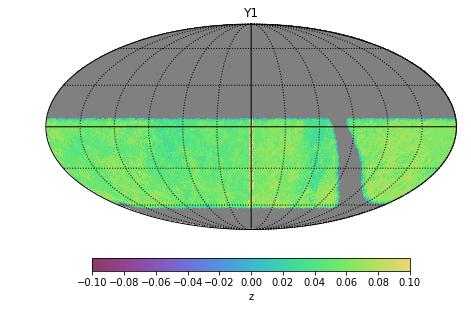

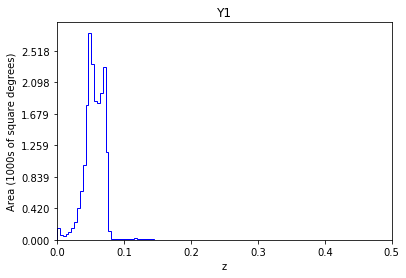

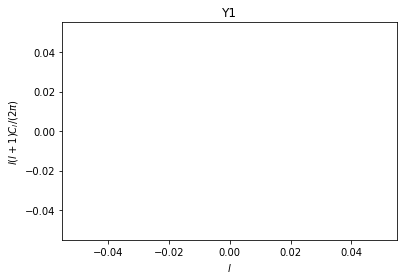

In [14]:
bgroup.plotAll(closefigs=False)

In [10]:
yearDates

[0, 365, 730, 1095, 1460]

In [23]:
import glob
files = glob.glob('{}/*.npz'.format(outDir))
print(files)

['descddf_v1.4_10yrs.db_SLTimeDelay/descddf_v1_4_10yrs_db_SNSLMetric_proposalId_1_AND_night_gt_0_AND_night_lt_365_HEAL.npz']


In [26]:
tab = np.load(files[0])
tab.files

['header',
 'metricValues',
 'mask',
 'fill',
 'slicer_init',
 'slicerName',
 'slicePoints',
 'slicerNSlice',
 'slicerShape']

In [35]:
metricValues = tab['metricValues']
print(len(metricValues))
idx = np.isnan(metricValues)
np.sum(metricValues[~idx])

49152


534.151562935999